# Descriptive statistics review with height and weight dataset

This file here concerns with reviewing our descriptive statistics skills, that's grouping and summarizing information about the data. Not inferencing, not there yet

Taken from this university
http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

This is the description of the dataset straight from the source

**Summary**

Human Height and Weight are mostly hereditable, but lifestyles, diet, health
and environmental factors also play a role in determining individual's physical
characteristics. The dataset below contains 25,000 synthetic records of human
heights and weights of 18 years old children.

These data were simulated based on a 1993 by a Growth Survey of 25,000 children
from birth to 18 years of age recruited from Maternal and Child Health Centres
(MCHC) and schools and were used to develop Hong Kong's current growth charts
for weight, height, weight-for-age, weight-for-height and body mass index
(BMI). See also the Major League Baseball Players Height and Weight dataset.

*My word on this dataset*

This is simulated, synthetic, this is not real. But...Good for practicing with large data I guess.
Not that large, large these days are in the TB's not even Gigs no more.


### Let's start

In [1]:
#First let's run our python initailization and import that datas in
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting the data frame insde
df = pd.read_csv('SOCR-HeightWeight.csv');

In [2]:
# How many is our observation ?
df.shape

(25000, 3)

In [3]:
# What attributes ? 
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

Alright let's get into it, first what is in our data, and what does it looks like ?

In [10]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


### Weight variable

***


Normal distribution and it's characteristics and graphs are below,

**Overall description**

It seems like the mean and the median and are in relatively in the same position ~ 127 pounds(which mean
there might be no outliers too heavy or too light).
Standard deviation are 11.67 pounds give or take.

And as you can see in the box plot, about middle 50% (or IQR, range of 25th percentile and 75th percentile) of the data is in there it should mean that
roughly 50% of our data sets is ranging from 119-134 pounds, And if you are over say 2 standard deviation
from the mean that's like less than 103 to more than 150 pounds in weight. It's less than roughtly 5% of
our distribution.

**Findings**
* Anyone in the weight range of 119 - 134, you are in the average 50% of the population.
* Anyone below or more of this and less than two standard deviation, then you can look in some
nutrition information to fixup your weight.
* Anyone more than 150 or less than 100 pounds you are outliers, check with your doctor, or
you might develop serious health prolbems.
* No skewed distribution presents which is normal.

In [11]:
# Basic description about this variable
df['Weight(Pounds)'].describe()

count    25000.000000
mean       127.079421
std         11.660898
min         78.014760
25%        119.308675
50%        127.157750
75%        134.892850
max        170.924000
Name: Weight(Pounds), dtype: float64

We can't tell anything from our data such because, with 25,0000 observations, you can't simply
look at it. Let's plot the height and weight histograms and see what's our distribution shapes.

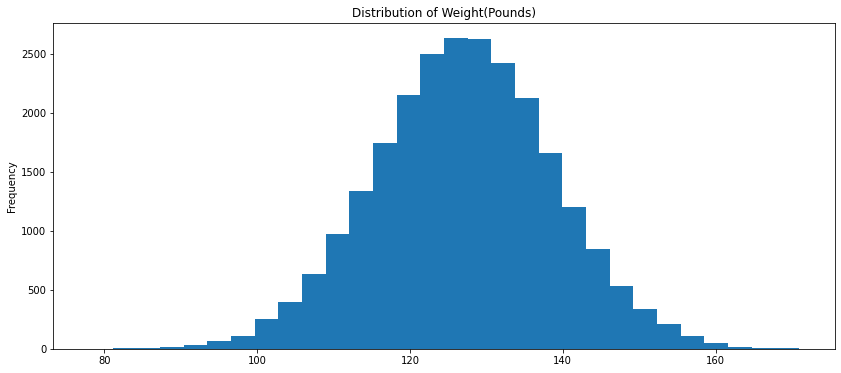

In [5]:
# Let's look at the weight first
ax = df['Weight(Pounds)'].plot(kind='hist',bins=30,figsize=(14,6), title='Distribution of Weight(Pounds)')

And of course if you wanted to draw a box plot

<AxesSubplot:>

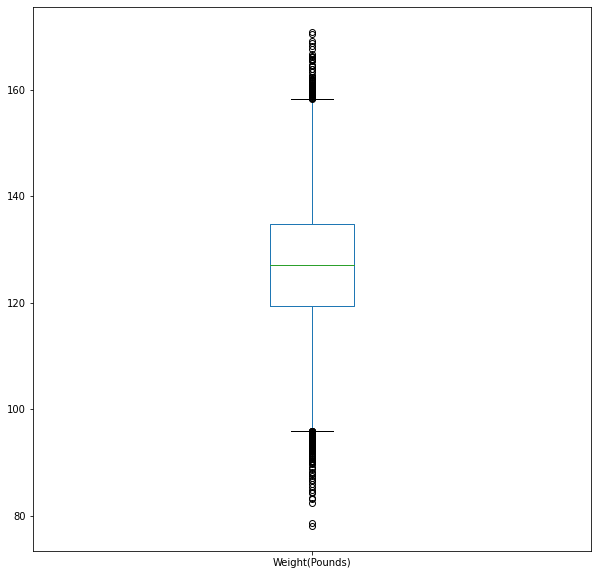

In [6]:
df['Weight(Pounds)'].plot(kind='box',figsize=(10,10))

### Height variable

---


This part here is going to examine the height variable, given that it might be the same as the weight, but
let's see.

We have a mean of 67 inches and std of 1.9 inches, that's quite low, I expected a more narrow distribution
graphs of height. It's median is about the same 67.

**Findings**:

* About 50% of the data is from 66 to 69 Inches in height
* Not a skewed distribution.
* Outliers, or anyone whos shorter that 65 or higher than 70 is consider to be outliers.

In [12]:
df['Height(Inches)'].describe()

count    25000.000000
mean        67.993114
std          1.901679
min         60.278360
25%         66.704397
50%         67.995700
75%         69.272958
max         75.152800
Name: Height(Inches), dtype: float64

<AxesSubplot:title={'center':'Distribution of Height(Inches)'}, ylabel='Frequency'>

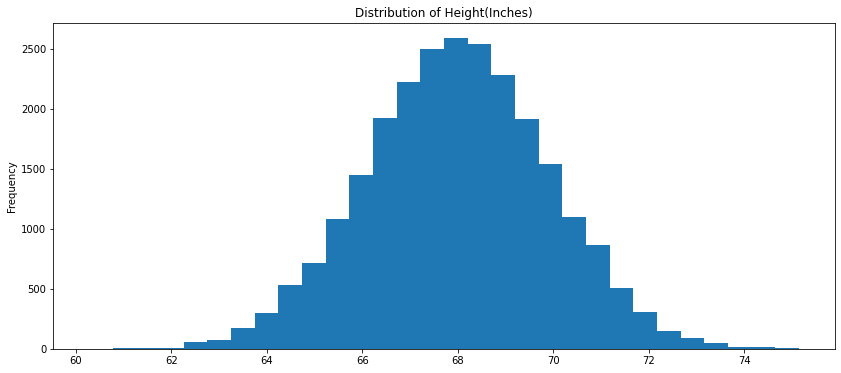

In [9]:
# Let's look at the Height
df['Height(Inches)'].plot(kind='hist',bins=30,figsize=(14,6), title='Distribution of Height(Inches)')

<AxesSubplot:>

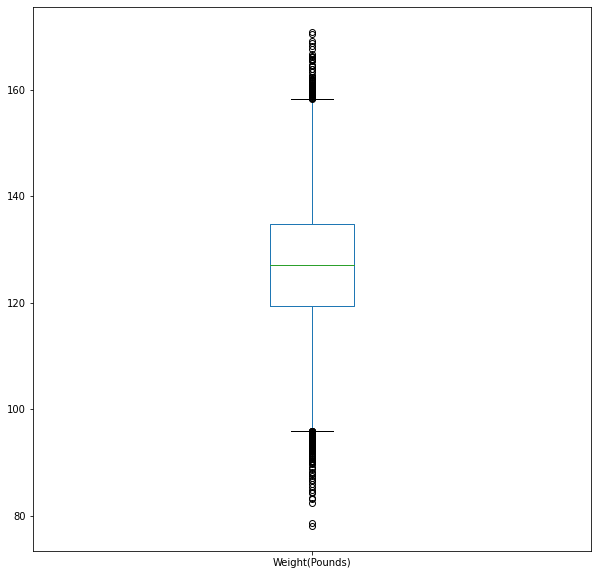

In [13]:
df['Weight(Pounds)'].plot(kind='box',figsize=(10,10))

### Further findings about the data

We do now know that both of our variables is normally distribution to their own mean and standard deviation.
This would mean Z score can be use to apply to this.

With Z score we can tell the range of the propotion we wanted in our distribution and conversely with propotion you can also tell the Z score.
In short, Z score tells us how far is the observation from the mean in standard deviation.
Also Z scores also applies to any normally distributed data to it's own mean and std. Z is normally distributed with $\mu$ = 0 and $\sigma$ = 1

$\mu + Zs$ and $\mu - Zs$

In this example we get Z = 1.29, this will be approximately 0.4 propotion from the mean of a normal distribution.

In [6]:
#Z score for weight, proporttion of 80% below and above the mean
print(df['Weight(Pounds)'].mean() - 1.29*df['Weight(Pounds)'].std())
print(df['Weight(Pounds)'].mean() + 1.29*df['Weight(Pounds)'].std())

112.0368633037505
142.12197901784953


In [7]:
#Z score for height proporttion of 80% below and above the mean
print(df['Height(Inches)'].mean() + 1.29*df['Height(Inches)'].std())
print(df['Height(Inches)'].mean() - 1.29*df['Height(Inches)'].std())

70.44627921165522
65.53994798194475


With Z score we can consider this:

**Weight**:
* approximately 80% of our data with Z = +- 1.29 which our range will be from 112 to 142 pounds
we can verify this by

In [8]:
df.loc[(df['Weight(Pounds)']>112) & (df['Weight(Pounds)']<142)].shape[0]/df.shape[0] * 100

80.256

**Height**:

* Lets use the same 1.29 And our range is 65 to 70 inches this should be about 80% of the distribution.

In [9]:
df.loc[(df['Height(Inches)']>65) & (df['Height(Inches)']<70)].shape[0]/df.shape[0] * 100

79.384

Close enough but you get my point.

## Regression

----



With our graphs and tools below we found out the correlation between height and weight

Using correlaction formulae

$ r = \frac{SP_{xy}}{\sqrt{(SS_x)(SS_y)}}$

Where 

$SP_{xy} = \sum(X - \bar{X})(Y - \bar{Y})$

And

$SS_x = (X - \bar{X})^2$

$SS_y = (Y - \bar{Y})^2$

Note: Squaring the distance to the mean because of mathematical limitation or something called zero-sum.

Using these to get the correlation between height and weight

$r$ = 0.502859

$r^2$ = 0.25286

And the $r^2$ tells us that Weight varialbility is explained 25% by Height. Not too shabby I supposed.
Given any height and weight of any person, living condition and eating habits, exercise habits,
are they living a sedentary life or not. With just only height, you can explain 25% of the varialbility
is good enough. We can increase the accuracy when we get some more info or get more variables. 

Of course this only tells us that the height variable is a good **predictor** not necessarily cause of weight.

But this is good enough, normally even if $r^2$ = 5% or any of that matter is good enough, but 25%, I don't have any
complain.

In [51]:
# Correlation between Weight and Height
df['Weight(Pounds)'].corr(df['Height(Inches)'])

0.5028585206028442

In [53]:
# Explain varialbility between Weight and Height
np.power(df['Weight(Pounds)'].corr(df['Height(Inches)']),2)

0.25286669174288107

<AxesSubplot:title={'center':'Relationship of height and weight'}, xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

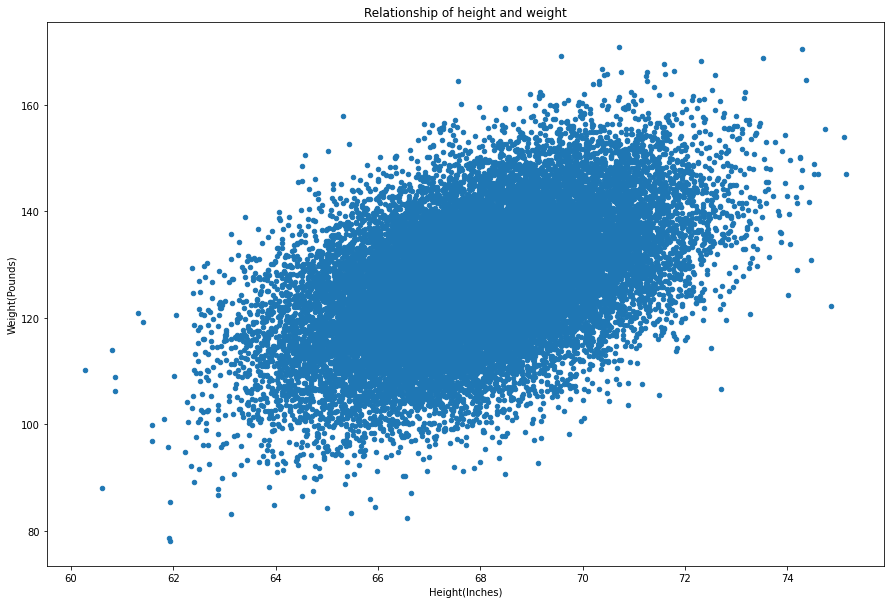

In [54]:
df.plot.scatter(x='Height(Inches)',y='Weight(Pounds)', figsize=(15,10), title='Relationship of height and weight')

### Linear regression

Alright, the fun part. Assume the relationship is linear, no sign of homoscedacity(atleast visually). Let's use
linear regression to guess our weight given our height. And let's get the error aswel.

---


**The function**

This is our linear regression with error as least square, this line will minimize the least total square 
predictive error.

$Y = bX + a$

with the slope of the line

$b = r\sqrt{\frac{SS_y}{SS_x}}$

And deviates y-axis from the origin

$a = \overline{y} - b\overline{x}$

**The standard error of estimate**

With our function, now comes the error to measure how our function is doing when predicting $Y'$
Denoted $s_{y|x}$ we define our error as

$s_{y|x} = \sqrt{\frac{\sum(Y' - Y)^2}{n-2}} = \sqrt{\frac{SS_y(1-r^2)}{n-2}}$

As similar to calculating deviation from the mean, we here calculates deviations from the real value (value from the data set). And
our degree of freedom is now n-2, 2 variable dependent variable. 

<AxesSubplot:title={'center':'Relationship of height and weight'}, xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

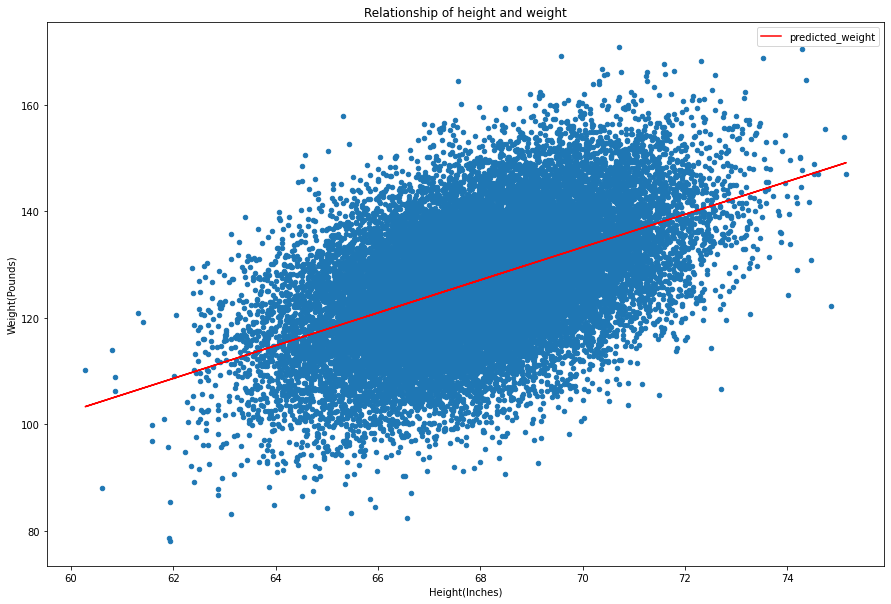

In [12]:
#Referencing function polyfit

#Fit a 1d poly then get everything return.
d,residuals, rank, singular_values, rcond = np.polyfit(df['Height(Inches)'],df['Weight(Pounds)'],1,full=True)
f = np.poly1d(d)

#-----------------------------------
#Calculating manually with formulae to be sure my formulae is correct.
#Getting to it
r = df['Height(Inches)'].corr(df['Weight(Pounds)']) #Correlation
my = df['Weight(Pounds)'].mean(); # Mean of y
ssy = sum(np.power(df['Weight(Pounds)'] - my,2)) # sum square of y
mx = df['Height(Inches)'].mean(); # mean of x
ssx = sum(np.power(df['Height(Inches)'] - mx,2)) # sum square of x

#Calculating b
b = r*np.sqrt(ssy/ssx)
#Calculating a
a = my - b*mx
#Result:
# **My calculation matches with the polyfit function.
#-------------------
#Concatnate the Y' to the temporary table
lndf = df.copy()
lndf['predicted_weight'] = f(df['Height(Inches)'])
#Plot it
ax = lndf.plot.scatter(x='Height(Inches)',y='Weight(Pounds)', figsize=(15,10), title='Relationship of height and weight')
lndf.plot(x='Height(Inches)',y='predicted_weight', color='red',ax=ax)

Here we can see that the line fits straight in the middle. Well minimizing the total square predictive error.
Let's see what's the error here for $s_{y|x}$

In [110]:
np.sqrt(residuals/(df.shape[0]-2))

array([10.07951686])

In [112]:
#And manually
np.sqrt(ssy*(1-np.power(r,2))/(df.shape[0]-2))

10.079516864371323

Now let's try and predict some known value see's if our calculation holds up.

In [15]:
# Get a random person and their weight
pd = df.loc[df['Index']==np.random.randint(25000)]
pd['Weight(Pounds)']

13530    135.5441
Name: Weight(Pounds), dtype: float64

In [16]:
#And their weight predicted their known height is
print('Predicted weight using height: ',f(pd['Height(Inches)']))
print('Real Weight: ',pd['Weight(Pounds)'])

Predicted weight using height:  [130.99943368]
Real Weight:  13530    135.5441
Name: Weight(Pounds), dtype: float64


In [20]:
# Now what about my height ?
# I weight 85kg = 187.4 pounds
# my height 1.71m = 67.7 inches
f(67.7) 
# That's like off about 61 pounds = 27kgs differences. HAHAHA, well because it has fitted to the data. 
# It's expected because, in theory this is the training data. When fitted it's most likely the error in the
# training set will be very very low. And it's obvious that we would know what our predictive error
# is going to be high when predicting test set.

126.17561228923987

You can run this thing multiple times, Though correct, is not a good predictor because you only using one variable that's height, it can be better if you can get you hands on some more
variables with high $r^2$ to weight.

Then split that to train set(Fitting), validation set(Tuning), test set(Predicting evaluation).